In [25]:
import matplotlib.pyplot as plt
import json
from pathlib import Path
import pandas as pd
import numpy as np
import re
import pickle
from collections import namedtuple

%matplotlib inline

In [26]:
model = namedtuple('model', ['shape', 'activation', 'features', 'learning_rate'])

In [27]:
with open('./data/tests.pkl', 'rb') as f:
    data = pickle.load(f)
data.keys(), data['files'][100]

(dict_keys(['files', 'testing', 'training']),
 model(shape='24_16_12_8', activation='sigmoid', features='30', learning_rate='0.2_0.01'))

In [28]:
shapes = sorted({i.shape for i in data['files']})
print(shapes)

activations = sorted({i.activation for i in data['files']})
print(activations)

features = sorted({i.features for i in data['files']})
print(features)

learning_rates = sorted({i.learning_rate for i in data['files']})
print(learning_rates)

training_keys = sorted(data['training'][data['files'][0]].columns)
print(training_keys)

testing_keys = sorted(data['testing'][data['files'][0]].columns)
print(testing_keys)

['16_12_8', '16_8', '24_16_12_8', '8']
['sigmoid', 'tanh']
['10', '20', '30']
['0.1_0.01', '0.1_0.1', '0.2_0.001', '0.2_0.01', '0.2_0.2']
['accuracy', 'epoch', 'iteration', 'len', 'lr', 'time', 'total_loss']
['test_accuracy', 'test_loss']


model(shape='24_16_12_8', activation='sigmoid', features='30', learning_rate='0.2_0.2')
model(shape='24_16_12_8', activation='sigmoid', features='30', learning_rate='0.2_0.01')


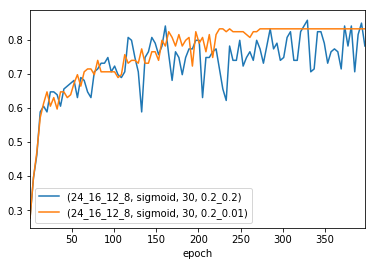

In [128]:
l = []
for k, v in data['testing'].items():
    if (0
        or k.shape not in ['24_16_12_8']
        or k.activation not in ['sigmoid']
        or k.features not in ['30']
        or k.learning_rate not in ['0.2_0.2', '0.2_0.01']
       ):
        continue
    v['test_accuracy'].iloc[::4].plot(label=k)
    print(k)
    l.append(k)
plt.legend()

model(shape='24_16_12_8', activation='sigmoid', features='30', learning_rate='0.2_0.2')
model(shape='24_16_12_8', activation='sigmoid', features='30', learning_rate='0.2_0.01')


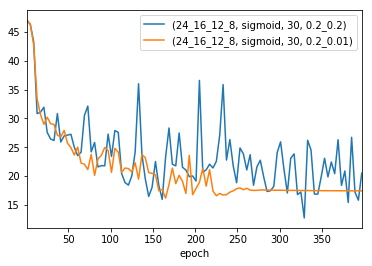

In [129]:
l = []
for k, v in data['testing'].items():
    if (0
        or k.shape not in ['24_16_12_8']
        or k.activation not in ['sigmoid']
        or k.features not in ['30']
        or k.learning_rate not in ['0.2_0.2', '0.2_0.01']
       ):
        continue
    v['test_loss'].iloc[::4].plot(label=k)
    print(k)
    l.append(v)
plt.legend()

Text(0,0.5,'błąd średniokwadratowy')

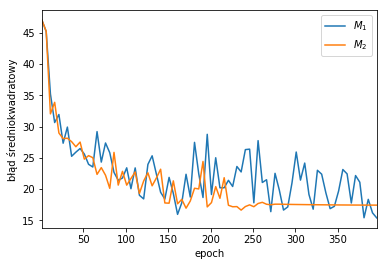

In [154]:
n = 5
l[0]['test_loss'].iloc[::n].plot(label='$M_1$')
l[1]['test_loss'].iloc[::n].plot(label='$M_2$')
plt.legend()
plt.ylabel('błąd średniokwadratowy')

Text(0,0.5,'dokładność [%]')

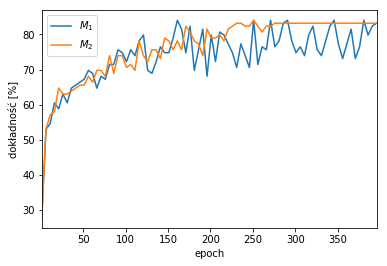

In [153]:
(l[0]['test_accuracy'].iloc[::n] * 100).plot(label='$M_1$')
(l[1]['test_accuracy'].iloc[::n] * 100).plot(label='$M_2$')
plt.legend()
plt.ylabel('dokładność [%]')

In [125]:
df1 = l[0].copy()
df2 = l[1].copy()
print(df1.columns)
df1.columns = [f'M1_{i}' for i in df1.columns]
df2.columns = [f'M2_{i}' for i in df2.columns]
df = pd.concat([df1, df2], axis=1)
for i, j in df.iterrows():
    if i != 1 and i % 10:
        continue
    print(r'{} & {} \\ \hline'.format(i, ' & '.join([f'{i:.3f}' for i in j])))

Index(['test_accuracy', 'test_loss'], dtype='object')
1 & 0.277 & 47.031 & 0.277 & 47.031 \\ \hline
10 & 0.513 & 37.573 & 0.563 & 33.302 \\ \hline
20 & 0.588 & 32.163 & 0.622 & 29.612 \\ \hline
30 & 0.622 & 27.482 & 0.597 & 30.062 \\ \hline
40 & 0.647 & 26.037 & 0.647 & 27.523 \\ \hline
50 & 0.655 & 27.505 & 0.655 & 27.221 \\ \hline
60 & 0.655 & 31.413 & 0.664 & 25.058 \\ \hline
70 & 0.655 & 29.571 & 0.723 & 22.468 \\ \hline
80 & 0.697 & 22.540 & 0.689 & 22.567 \\ \hline
90 & 0.714 & 22.712 & 0.731 & 22.202 \\ \hline
100 & 0.639 & 33.643 & 0.706 & 23.672 \\ \hline
110 & 0.672 & 30.809 & 0.756 & 21.424 \\ \hline
120 & 0.765 & 20.840 & 0.723 & 25.234 \\ \hline
130 & 0.773 & 19.664 & 0.714 & 23.904 \\ \hline
140 & 0.748 & 21.401 & 0.731 & 21.937 \\ \hline
150 & 0.739 & 22.939 & 0.739 & 20.739 \\ \hline
160 & 0.798 & 18.715 & 0.824 & 17.646 \\ \hline
170 & 0.748 & 20.608 & 0.790 & 17.594 \\ \hline
180 & 0.807 & 19.054 & 0.773 & 20.165 \\ \hline
190 & 0.790 & 20.590 & 0.824 & 16.881 \\ \hli

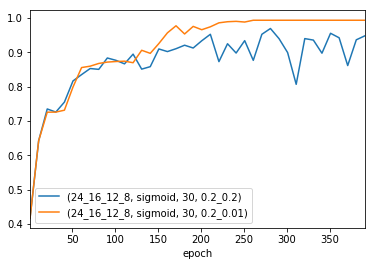

In [87]:
for k, v in data['training'].items():
    if (0
        or k.shape not in ['24_16_12_8']
        or k.activation not in ['sigmoid']
        or k.features not in ['30']
        or k.learning_rate not in ['0.2_0.2', '0.2_0.01']
       ):
        continue
    v.groupby('epoch').mean()['accuracy'].iloc[::10].plot(label=k)
plt.legend()

In [78]:
df = next(iter(data['training'].values()))
df.groupby('epoch').mean()

,accuracy,iteration,len,lr,time,total_loss
epoch,,,,,,
1,0.382505,175,357,0.100000,0.112079,4.100162
2,0.400872,175,357,0.099774,0.108928,3.761103
3,0.402096,175,357,0.099549,0.062669,3.749672
4,0.405072,175,357,0.099323,0.062845,3.744422
5,0.411087,175,357,0.099098,0.062463,3.740082
6,0.415878,175,357,0.098872,0.062562,3.735359
7,0.425903,175,357,0.098647,0.062537,3.729393
8,0.429753,175,357,0.098421,0.063442,3.721120
9,0.435181,175,357,0.098195,0.062850,3.708836


In [69]:
data['files']

[model(shape='24_16_12_8', activation='sigmoid', features='10', learning_rate='0.1_0.01'),
 model(shape='16_12_8', activation='tanh', features='30', learning_rate='0.2_0.2'),
 model(shape='8', activation='tanh', features='20', learning_rate='0.2_0.001'),
 model(shape='24_16_12_8', activation='tanh', features='10', learning_rate='0.1_0.01'),
 model(shape='16_8', activation='sigmoid', features='30', learning_rate='0.2_0.001'),
 model(shape='16_8', activation='sigmoid', features='20', learning_rate='0.1_0.1'),
 model(shape='24_16_12_8', activation='sigmoid', features='20', learning_rate='0.1_0.1'),
 model(shape='16_8', activation='sigmoid', features='10', learning_rate='0.2_0.2'),
 model(shape='16_12_8', activation='sigmoid', features='30', learning_rate='0.1_0.01'),
 model(shape='24_16_12_8', activation='sigmoid', features='20', learning_rate='0.2_0.01'),
 model(shape='8', activation='sigmoid', features='20', learning_rate='0.2_0.01'),
 model(shape='16_8', activation='sigmoid', features=